# 🛳️ Titanic Dataset Analysis (Task-2)
## 🎯 Objective
Analyze the Titanic dataset to explore **survival patterns** based on gender, passenger class, and age group — and visualize the findings.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 🧩 Step 2: Load the Titanic Dataset
Download the dataset from **Kaggle → Titanic: Machine Learning from Disaster** and place the file `titanic.csv` or `train.csv` in your working directory.

In [2]:
df = pd.read_csv('titanic.csv')  # or 'train.csv'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


## 🧼 Step 3: Data Cleaning
We'll check for missing values and handle them appropriately.

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.isnull().sum()

C:\Users\THAMARAISELVAM\AppData\Local\Temp\ipykernel_26836\4237432663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\THAMARAISELVAM\AppData\Local\Temp\ipykernel_26836\4237432663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 📊 Step 4: Exploratory Data Analysis (EDA)

In [5]:
gender_survival = df.groupby('Sex')['Survived'].mean()
print('Survival Rate by Gender:', gender_survival)

Survival Rate by Gender: Sex
female   0.74
male     0.19
Name: Survived, dtype: float64


In [6]:
class_survival = df.groupby('Pclass')['Survived'].mean()
print('Survival Rate by Passenger Class:', class_survival)

Survival Rate by Passenger Class: Pclass
1   0.63
2   0.47
3   0.24
Name: Survived, dtype: float64


In [7]:
bins = [0, 12, 18, 35, 50, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()
print('Survival Rate by Age Group:', agegroup_survival)

Survival Rate by Age Group: AgeGroup
Child         0.58
Teen          0.43
Young Adult   0.35
Adult         0.40
Senior        0.34
Name: Survived, dtype: float64


C:\Users\THAMARAISELVAM\AppData\Local\Temp\ipykernel_26836\1495853313.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()


## 🎨 Step 5: Visualizations

C:\Users\THAMARAISELVAM\AppData\Local\Temp\ipykernel_26836\2788430441.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')


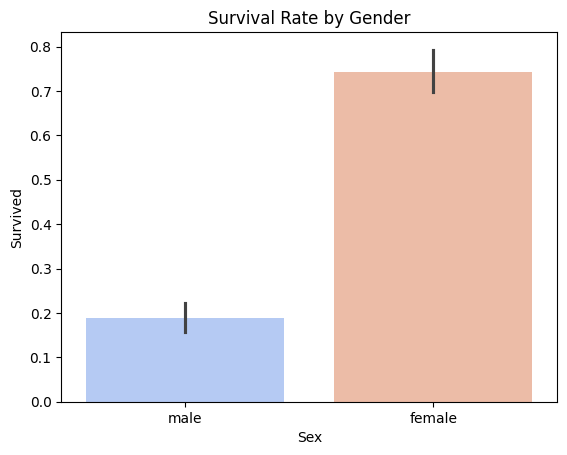

In [8]:
sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.show()

C:\Users\THAMARAISELVAM\AppData\Local\Temp\ipykernel_26836\486806364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


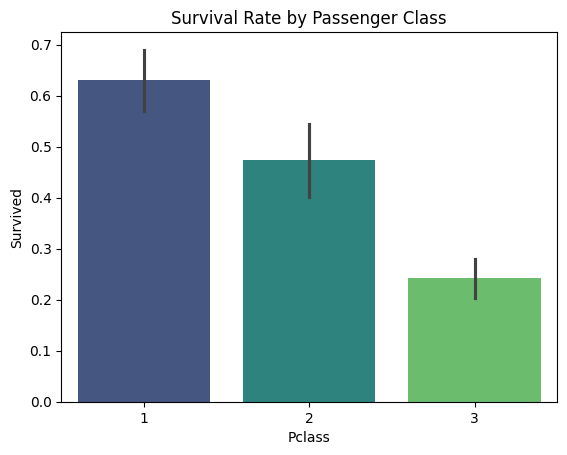

In [9]:
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.show()

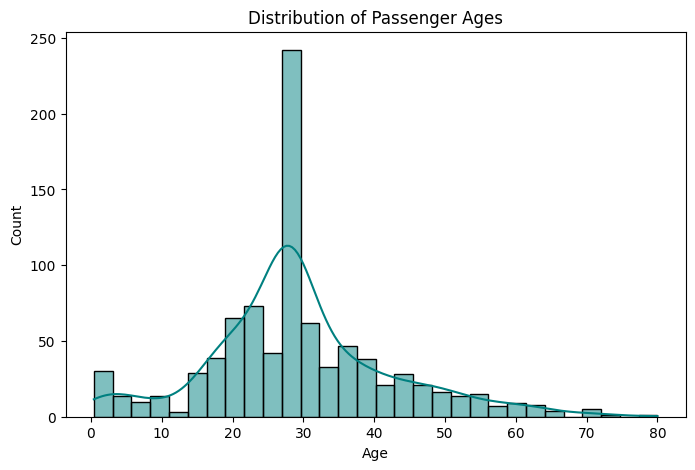

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='teal')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 🧠 Step 6: Summary of Findings
| Question | Insight |
|-----------|----------|
| Who survived more? | **Females** had a much higher survival rate than males. |
| Did class affect survival? | **1st-class passengers** had better survival chances. |
| Survival by age group? | **Children and young adults** survived more often. |